### 6.	Take a binary image and a structuring element to perform the following morphological operations:
        (b)	Opening and Closing operations

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

### Erosion

In [2]:
def erosion(image, structuring_element):

    # Get the dimensions of the structuring element
    kernel_size = structuring_element.shape[0]
    offset = kernel_size // 2

    # Pad the image with zeros to handle border pixels
    padded_image = np.pad(image, pad_width=offset)

    # Create a zero-filled array for the output
    eroded_image = np.zeros_like(image)

    # Iterate over the image (excluding the padding in the original dimensions)
    for i in range(offset, padded_image.shape[0] - offset):
        for j in range(offset, padded_image.shape[1] - offset):
            
            # Extract the region of interest from the padded image
            region = padded_image[i - offset:i + offset + 1, j - offset:j + offset + 1]

            # Check if the structuring element completely fits inside the region
            if np.array_equal(region & structuring_element, structuring_element):
                # If it fits, set the corresponding pixel in the eroded image to 255
                eroded_image[i - offset, j - offset] = 255

    return eroded_image

### Dilation

In [3]:
def dilation(image, structuring_element):

    # Get the dimensions of the structuring element
    kernel_size = structuring_element.shape[0]
    offset = kernel_size // 2

    # Pad the image with zeros to handle border pixels
    padded_image = np.pad(image, pad_width=offset)

    # Create a zero-filled array for the output
    dilated_image = np.zeros_like(image)

    # Iterate over the image (excluding the padding in the original dimensions)
    for i in range(offset, padded_image.shape[0] - offset):
        for j in range(offset, padded_image.shape[1] - offset):
            
            # Extract the region of interest from the padded image
            region = padded_image[i - offset:i + offset + 1, j - offset:j + offset + 1]

            # Check if any part of the structuring element overlaps with the region
            if np.any(region & structuring_element):
                # If there is an overlap, set the corresponding pixel in the dilated image to 255
                dilated_image[i - offset, j - offset] = 255

    return dilated_image

### Opening

In [4]:
def opening(image, structuring_element):

    # Apply erosion followed by dilation
    openedImage = erosion(image, structuring_element)
    openedImage = dilation(openedImage, structuring_element)

    return openedImage

### Closing

In [5]:
def closing(image, structuringElement):

    # Apply dilation followed by erosion
    closedImage = dilation(image, structuringElement)
    closedImage = erosion(closedImage, structuringElement)

    return closedImage

In [6]:
originalImage = cv2.imread("img3.tif", cv2.IMREAD_GRAYSCALE)

structuringElement = np.ones((3, 3), dtype=np.uint8)

(np.float64(-0.5), np.float64(314.5), np.float64(237.5), np.float64(-0.5))

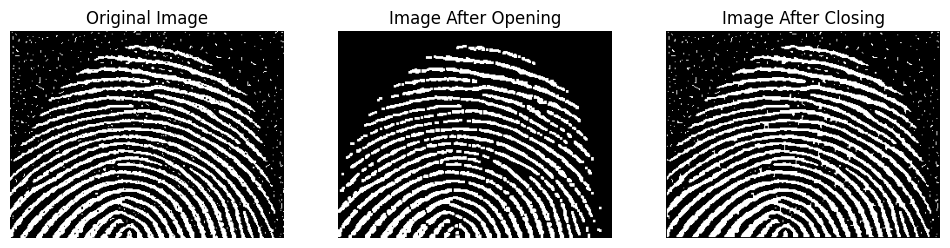

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(originalImage, cmap='gray')
plt.title('Original Image')
plt.axis('off')

openedImage = opening(originalImage, structuringElement)
plt.subplot(1, 3, 2)
plt.imshow(openedImage, cmap='gray')
plt.title('Image After Opening')
plt.axis('off')

closedImage = closing(originalImage, structuringElement)
plt.subplot(1, 3, 3)
plt.imshow(closedImage, cmap='gray')
plt.title('Image After Closing')
plt.axis('off')